In [30]:
import plotly.express as px
from rindti.models import NoisyNodesClassModel, ClassificationModel, InfoGraphModel, GraphLogModel, PfamModel
from rindti.utils.data import Dataset
import pickle
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

In [31]:
with open('results/prepare_all/random_posneg_under_classification_template_label_none.pkl', 'rb') as file:
    data = pickle.load(file)

In [32]:
class TestModel(ClassificationModel):
    def embed_prot(self, x, edge_index, **kwargs):
        x = self.prot_feat_embed(x)
        x = self.prot_node_embed(x, edge_index)
        return self.prot_pool(x, edge_index, batch=None).detach().numpy().reshape(-1)
    
    def embed_drug(self, x, edge_index, **kwargs):
        x = self.drug_feat_embed(x)
        x = self.drug_node_embed(x, edge_index)
        return self.drug_pool(x, edge_index, batch=None).detach().numpy().reshape(-1)

In [33]:
class TestPretrainModel(PfamModel):
    def embed_prot(self, x, edge_index, **kwargs):
        x = self.feat_embed(x)
        x = self.node_embed(x, edge_index)
        return self.pool(x, edge_index, batch=None).detach().numpy().reshape(-1)

In [40]:
model = TestPretrainModel.load_from_checkpoint('tb_logs/pfam/version_0/checkpoints/epoch=39-step=6359.ckpt')

In [41]:
embeds = {}
for id, prot in data['prots']['data'].to_dict().items():
    emb = model.embed_prot(**prot)
    embeds[id] = emb
prot_embeds = pd.DataFrame(embeds).T

<AxesSubplot:>

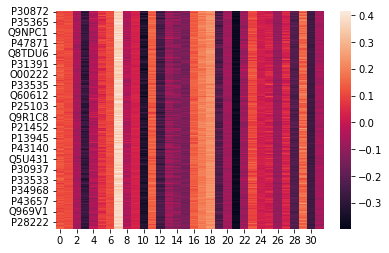

In [42]:
sns.heatmap(prot_embeds)

In [43]:
tsne = TSNE()
x = tsne.fit_transform(prot_embeds)

In [44]:
px.scatter(x, 0, 1, hover_name=prot_embeds.index)

In [ ]:
embeds = {}
for id, drug in data['drugs']['data'].to_dict().items():
    emb = model.embed_drug(**drug)
    embeds[id] = emb
drug_embeds = pd.DataFrame(embeds).T